<a href="https://colab.research.google.com/github/cindyellow/JSC270_Assignment3/blob/main/JSC270_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## JSC270 Assignment 3

In [1]:
import numpy as np


## Question 1
### 1d)

In [2]:
# Set seed for reproducibility
np.random.seed(100)

#### definining my_dist_sampler:
def my_beta(a, b):
  x = np.random.beta(a,b)
  return x

def beta_dist_sampler(a,b,n):
  my_sample = [my_beta(a,b) for i in range(n)]
  return my_sample

def mean_dist(a,b,n,n_rs):
  means = [np.mean(beta_dist_sampler(a,b,n)) for i in range(n_rs)]
  return means, np.mean(means), np.std(means)

prior_means, prior_rs_mean, prior_rs_sd = mean_dist(a=1,b=1,n=20, n_rs=1000)
post_means, post_rs_mean, post_rs_sd = mean_dist(a=5,b=17,n=20, n_rs=1000)
print("The prior mean is:", prior_rs_mean)
print("The posterior mean is:", post_rs_mean)

The prior mean is: 0.5002341539189781
The posterior mean is: 0.22655750230952304


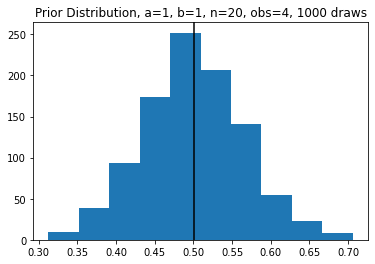

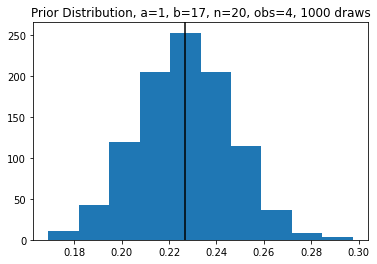

In [3]:
import matplotlib.pyplot as plt

plt.hist(prior_means)
plt.axvline(prior_rs_mean, color = 'k')
plt.title("Prior Distribution, a=1, b=1, n=20, obs=4, 1000 draws")
plt.show()

plt.hist(post_means)
plt.axvline(post_rs_mean, color = 'k')
plt.title("Prior Distribution, a=1, b=17, n=20, obs=4, 1000 draws")
plt.show()

### 1e)

The prior mean is: 0.24882450439893505
The posterior mean is: 0.20854556994998938


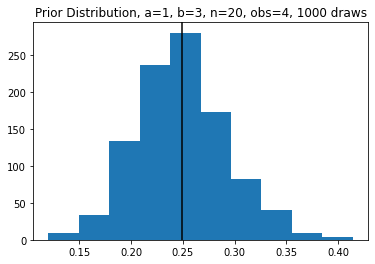

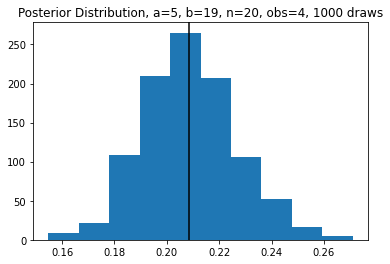

In [4]:
prior_means2, prior_rs_mean2, prior_rs_sd2 = mean_dist(a=1,b=3,n=20, n_rs=1000)
post_means2, post_rs_mean2, post_rs_sd2 = mean_dist(a=5,b=19,n=20, n_rs=1000)
print("The prior mean is:", prior_rs_mean2)
print("The posterior mean is:", post_rs_mean2)

plt.hist(prior_means2)
plt.axvline(prior_rs_mean2, color = 'k')
plt.title("Prior Distribution, a=1, b=3, n=20, obs=4, 1000 draws")
plt.show()

plt.hist(post_means2)
plt.axvline(post_rs_mean2, color = 'k')
plt.title("Posterior Distribution, a=5, b=19, n=20, obs=4, 1000 draws")
plt.show()

### 1f)

The prior mean is: 0.24905924088107662
The posterior mean is: 0.3120834386710897


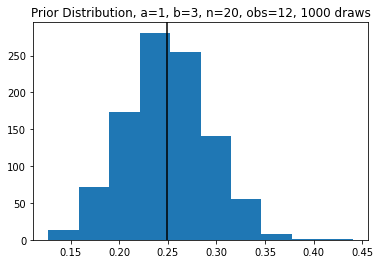

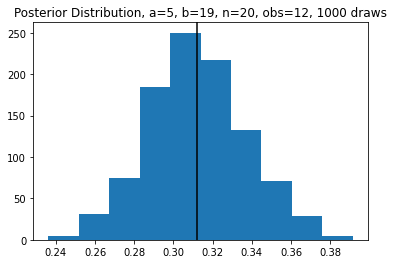

In [5]:
prior_means3, prior_rs_mean3, prior_rs_sd3 = mean_dist(a=1,b=3,n=20, n_rs=1000)
post_means3, post_rs_mean3, post_rs_sd3 = mean_dist(a=5,b=11,n=20, n_rs=1000)
print("The prior mean is:", prior_rs_mean3)
print("The posterior mean is:", post_rs_mean3)

plt.hist(prior_means3)
plt.axvline(prior_rs_mean3, color = 'k')
plt.title("Prior Distribution, a=1, b=3, n=20, obs=12, 1000 draws")
plt.show()

plt.hist(post_means3)
plt.axvline(post_rs_mean3, color = 'k')
plt.title("Posterior Distribution, a=5, b=19, n=20, obs=12, 1000 draws")
plt.show()

## Question 2
### 2b)

In [6]:
## sample data 
n10 = np.random.exponential(scale=0.5,size=10)
n20 = np.random.exponential(scale=0.5,size=20)
n50 = np.random.exponential(scale=0.5,size=50)
n100 = np.random.exponential(scale=0.5,size=100)
n500 = np.random.exponential(scale=0.5,size=500)
n2000 = np.random.exponential(scale=0.5,size=2000)

Text(0.5, 1.0, 'n=2000')

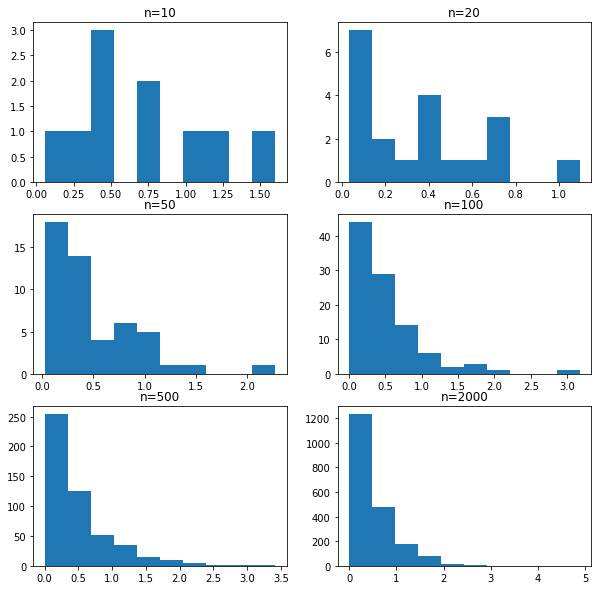

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(10,10))
axs[0, 0].hist(n10)
axs[0, 0].set_title('n=10')
axs[0, 1].hist(n20)
axs[0, 1].set_title('n=20')
axs[1, 0].hist(n50)
axs[1, 0].set_title('n=50')
axs[1, 1].hist(n100)
axs[1, 1].set_title('n=100')
axs[2, 0].hist(n500)
axs[2, 0].set_title('n=500')
axs[2, 1].hist(n2000)
axs[2, 1].set_title('n=2000')

###1c)

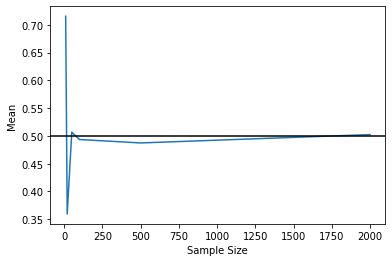

In [8]:
def get_means(samples):
  means = [np.mean(s) for s in samples]
  return means

x = [10,20,50,100,500,2000]
y = get_means([n10,n20,n50,n100,n500,n2000])
plt.plot(x, y)
plt.axhline(0.5, color = 'k')
plt.ylabel('Mean')
plt.xlabel('Sample Size')
plt.show()

## Question 3
## 3a)

In [53]:
np.random.seed(69)
N = 1000
t = 2 
b0 = 5
b1 = 0.6
b2 = 0.8
b3 = 0.4
c = 0.5

def my_unif(a,b):
  x = np.random.uniform(a,b)
  return x

# n = sample size
def unif_dist_sampler(a,b,n):
  my_sample = [my_unif(a,b) for i in range(n)]
  return my_sample

rand_x1i_sample = unif_dist_sampler(-100,100,N)
rand_x2i_sample = unif_dist_sampler(-150,150,N)

# Generate a random di
rand_di_sample = np.random.choice([0,1,2,3,4],size = N)

# Generate a sample of 10 from a standard normal density
rand_ei_sample = np.random.normal(0,(t*t),size=N)
reg_line = [(b0 + b1*(xi[i][0])+ b2*(xi[i][1]) + b3*(xi[i][2]) + rand_ei_sample[i]) for i in range(N)]

def sigmoid(t):
  pi = np.exp(t) / (1 + np.exp(t))
  return pi

rand_pi_sample = [(sigmoid(reg_line[i])) for i in range(N)]

yi = [(rand_pi_sample[i] > c).astype(int) for i in range(N)]
xi = [[rand_x1i_sample[i],rand_x2i_sample[i],rand_di_sample[i]] for i in range(N)]

[[-40.750167665513295, 106.57484268353, 3],
 [61.81354313466534, -111.91563737483239, 3],
 [-29.949494955317718, -51.76929710679478, 2],
 [57.88185128617852, 58.850187620193964, 4],
 [12.269795154114504, 105.8955292572229, 1],
 [-49.28220915597337, 78.19275935219687, 2],
 [-79.00458326297819, -108.15734989988313, 2],
 [-88.30785416062406, -6.7735639579987605, 1],
 [34.65847615396885, -91.60751584595974, 0],
 [39.56593140034201, -3.306867948747282, 0],
 [46.556641190330794, 6.142005202139558, 3],
 [57.574811699542096, 102.91909370605902, 4],
 [-84.72473592128145, 59.09355267031262, 1],
 [-36.46388067600714, -107.41392944712251, 2],
 [48.204655436725375, -6.2987814455067905, 2],
 [-34.30115416499039, 102.11776860126585, 2],
 [-5.970903015991141, 111.2007592315349, 4],
 [-63.78285645306314, 121.33155020713605, 0],
 [-35.29911963817986, -79.81474136913877, 0],
 [-9.018768806602353, 110.0373088936663, 0],
 [5.926103096350531, -92.76098450505202, 3],
 [-41.39389026950304, -104.31643696067528

###3b)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
RS = 100
std_scaler = StandardScaler()
xi = std_scaler.fit_transform(xi)

X_train, X_test, y_train, y_test = train_test_split(xi, yi, test_size = 0.2, shuffle=True, random_state=RS)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *


logreg = LogisticRegression(penalty='none', fit_intercept = True, random_state=RS, max_iter=1000)
logreg.fit(X_train, y_train)

# Examine the coefficients and intercept
print('Logistic Regression Coefficients:\n',logreg.coef_)
print('Intercept:\n', logreg.intercept_)

# Get fitted values from training set
y_train_preds_lr = logreg.predict(X_train)

# Get fitted values from test set
y_test_preds_lr = logreg.predict(X_test)

# Print train and test errors
train_acc = accuracy_score(y_train, y_train_preds_lr)
test_acc = accuracy_score(y_test, y_test_preds_lr)

print('Train Accuracy: ',train_acc)
print('Test Accuracy: ',test_acc)

Logistic Regression Coefficients:
 [[24.68585532 51.46004712  1.24429529]]
Intercept:
 [2.46913602]
Train Accuracy:  0.99125
Test Accuracy:  0.985


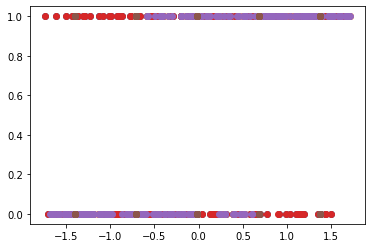

NameError: ignored

In [12]:
plt.plot(X_test,y_test,'o')
plt.plot(X_test, y_test_preds_lr, 'o')
plt.show()
# Plot the ROC curve for Logistic Regression
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operator Characteristic (ROC) Curve for Logistic Regression')
plt.show()

# Plot the PR Curve for Logistic Regression
precision, recall, thresholds = precision_recall_curve(y_test, y_test_preds_lr, pos_label = 1)

plt.plot(precision,recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision Recall (ROC) Curve for Logistic Regression')
plt.show()

###3c)

In [47]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(270)
M = 1000
B = 5000
def bootstrap_decision_tree(resample_size, resample_num, xi, yi):
  metrics = []
  for j in range(resample_num):
    resample_indices = [np.random.randint(0,len(xi)) for n in range(resample_size)]
    y_resample = []
    X_resample = []
    y_oob = []
    X_oob = []
    for i in range(len(xi)):
      if i in resample_indices:
        y_resample.append(yi[i])
        X_resample.append(xi[i])
      else:
        y_oob.append(yi[i])
        X_oob.append(xi[i])
    dtc = DecisionTreeClassifier()
    dtc.fit(X_resample, y_resample)
    y_oob_preds = dtc.predict(X_oob)
    oob_acc = accuracy_score(y_oob,y_oob_preds)
    metrics.append(oob_acc)
  return metrics

metrics_lst = bootstrap_decision_tree(M,B,xi,yi)



###3d)

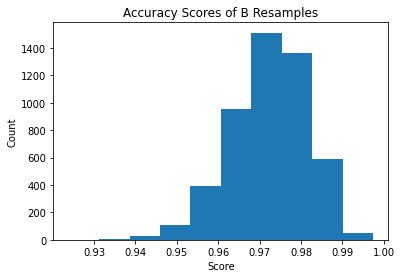

In [50]:
plt.hist(metrics_lst)
plt.ylabel('Count')
plt.xlabel('Score')
plt.title('Accuracy Scores of B Resamples')
plt.show()


###3e)

In [51]:
np.mean(metrics_lst)

0.9724080477861414